In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.cosmology import Planck18
import fitsio

In [2]:
k = Table.read('/pscratch/sd/z/zhaozhon/DATASET/DESI-data/k.csv',format='csv')
indice = np.isnan(k['k_gg']) | np.isinf(k['k_gg']) | np.isnan(k['k_rr']) | np.isinf(k['k_rr'])
k_gg = k['k_gg'][~indice]
k_rr = k['k_rr'][~indice]
# Calculate the fraction of data that remains
fraction_remaining = len(k_gg) / len(k['k_gg'])
print(f"Fraction of data that remained: {fraction_remaining:.2f}")

Fraction of data that remained: 1.00


In [3]:
file = '/pscratch/sd/z/zhaozhon/DATASET/DESI-data/new_d.fits'
d = Table(fitsio.read(file))
SEL = np.where((d['Z'] > 2.3) & (d['Z'] < 2.8))[0]
apr_mag_g = d['APP_MAG_G'][SEL][~indice]
apr_mag_g_err = d['APP_MAGERR_G'][SEL][~indice]
apr_mag_r = d['APP_MAG_R'][SEL][~indice]
apr_mag_r_err = d['APP_MAGERR_R'][SEL][~indice]
z = d['Z'][SEL][~indice]

In [4]:
d = Planck18.distmod(z).value

In [5]:
print(np.std(apr_mag_r))
print(np.std(apr_mag_r-d))
print(np.std(apr_mag_r-d-k_rr))

1.0389214
1.0561658304144665
1.0607040369580387


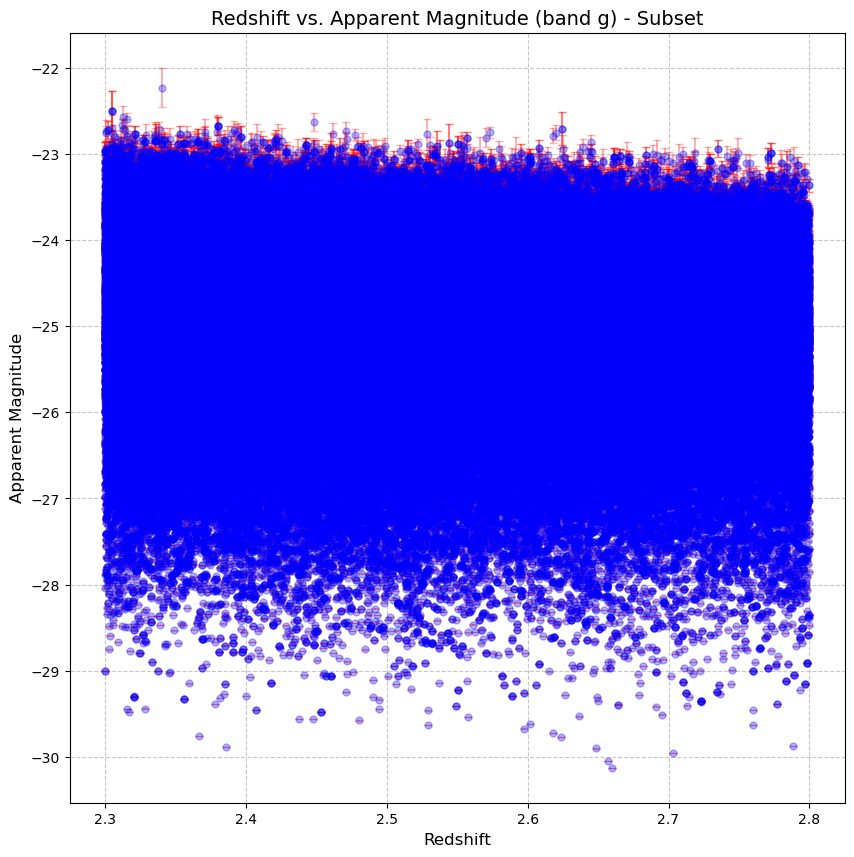

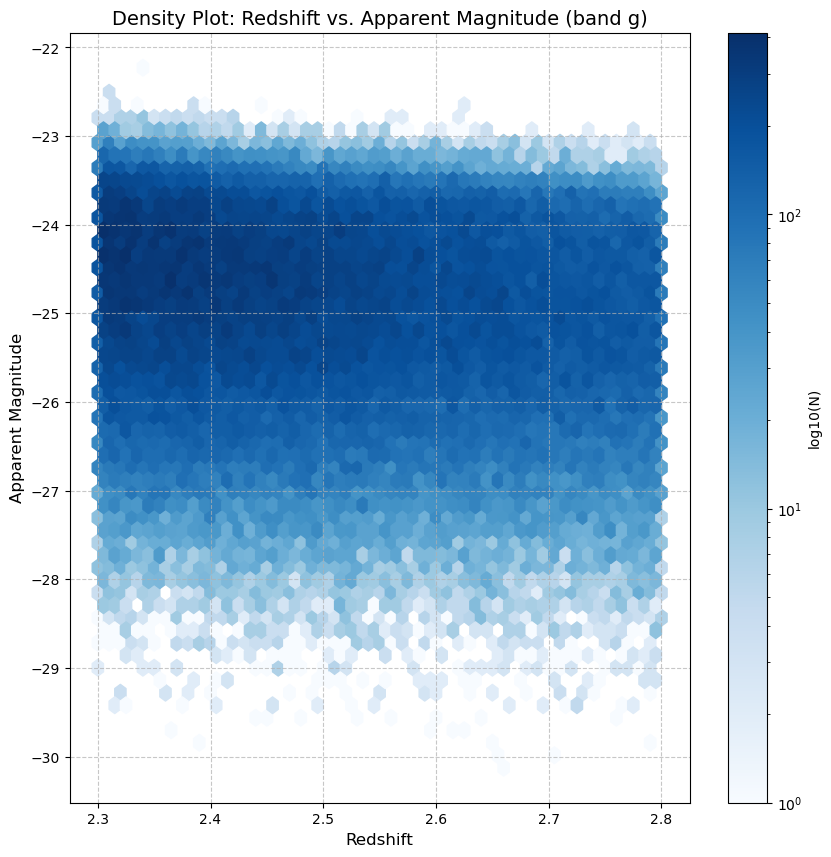

In [6]:
plt.figure(figsize=(10, 10))
plt.errorbar(z, apr_mag_g-d, yerr=apr_mag_g_err, fmt='o', color='blue', ecolor='red', capsize=3, markersize=5, alpha=0.3)
plt.title('Redshift vs. Apparent Magnitude (band g) - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_g', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g-d, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Apparent Magnitude (band g)', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_g_density', dpi=300)  # Saving the hexbin plot

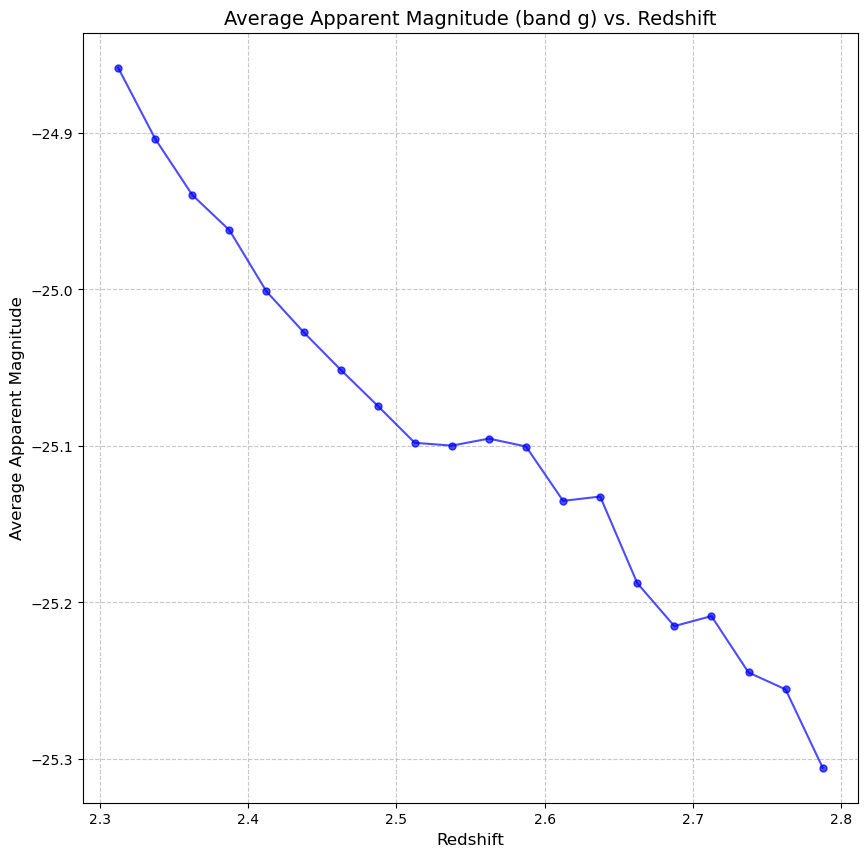

In [7]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average magnitude for each bin
avg_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_magnitude.append(np.mean(apr_mag_g[bin_mask] - d[bin_mask]))
    else:
        avg_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Apparent Magnitude (band g) vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_apr_mag_g', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [8]:
print(max(avg_magnitude)-min(avg_magnitude))

0.44731956046974375


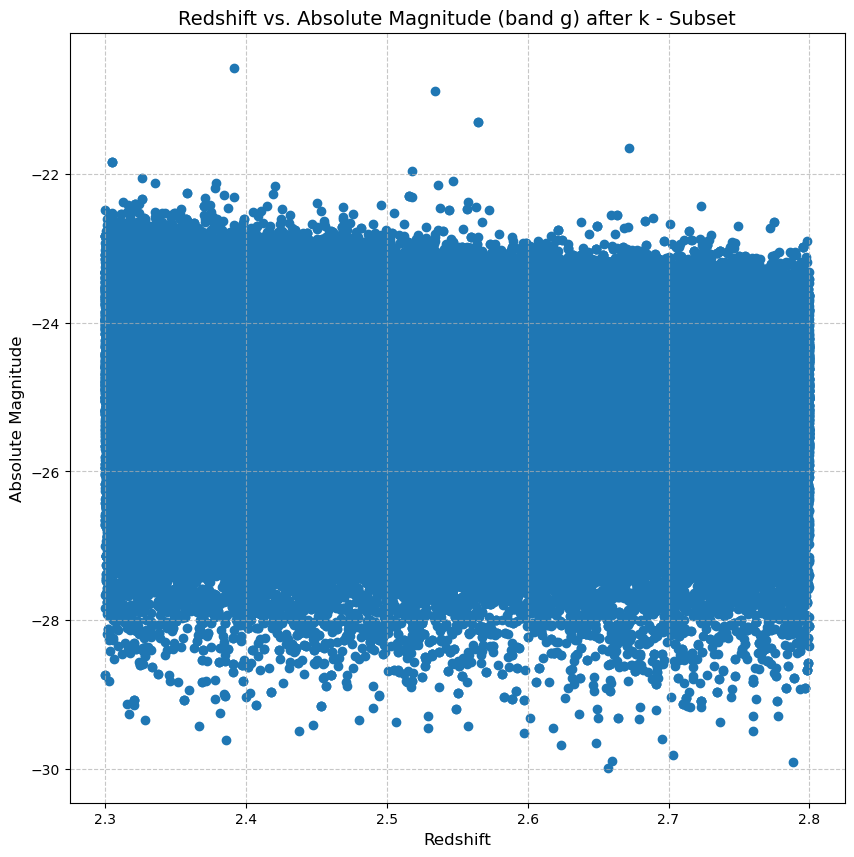

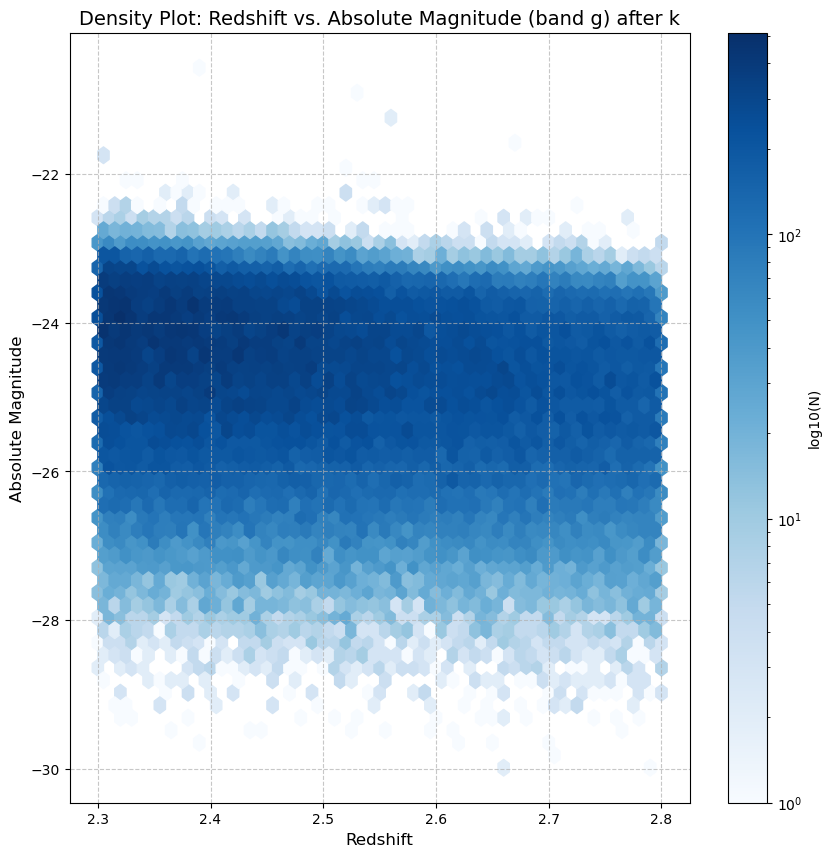

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(z, apr_mag_g-d-k_gg)
plt.title('Redshift vs. Absolute Magnitude (band g) after k - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_g', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g-d-k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Absolute Magnitude (band g) after k', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_density_g', dpi=300)  # Saving the hexbin plot


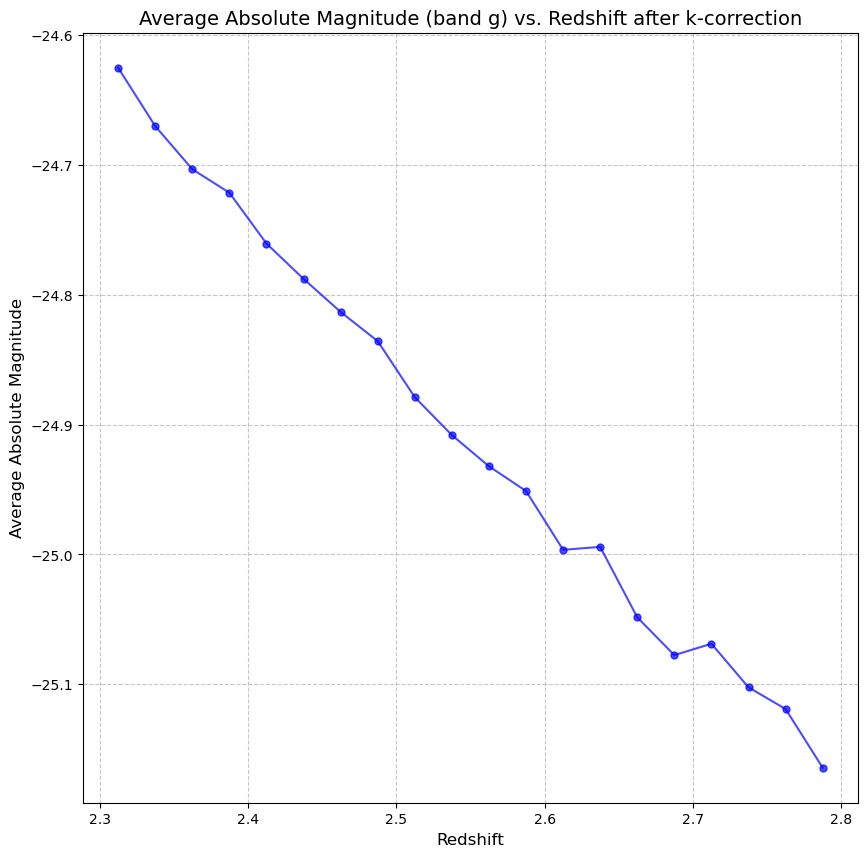

In [10]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average absolute magnitude for each bin
avg_absolute_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_absolute_magnitude.append(np.mean(apr_mag_g[bin_mask] - d[bin_mask] - k_gg[bin_mask]))
    else:
        avg_absolute_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average absolute magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_absolute_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Absolute Magnitude (band g) vs. Redshift after k-correction', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_abs_mag_g', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [11]:
print(max(avg_absolute_magnitude)-min(avg_absolute_magnitude))

0.5389665126614744


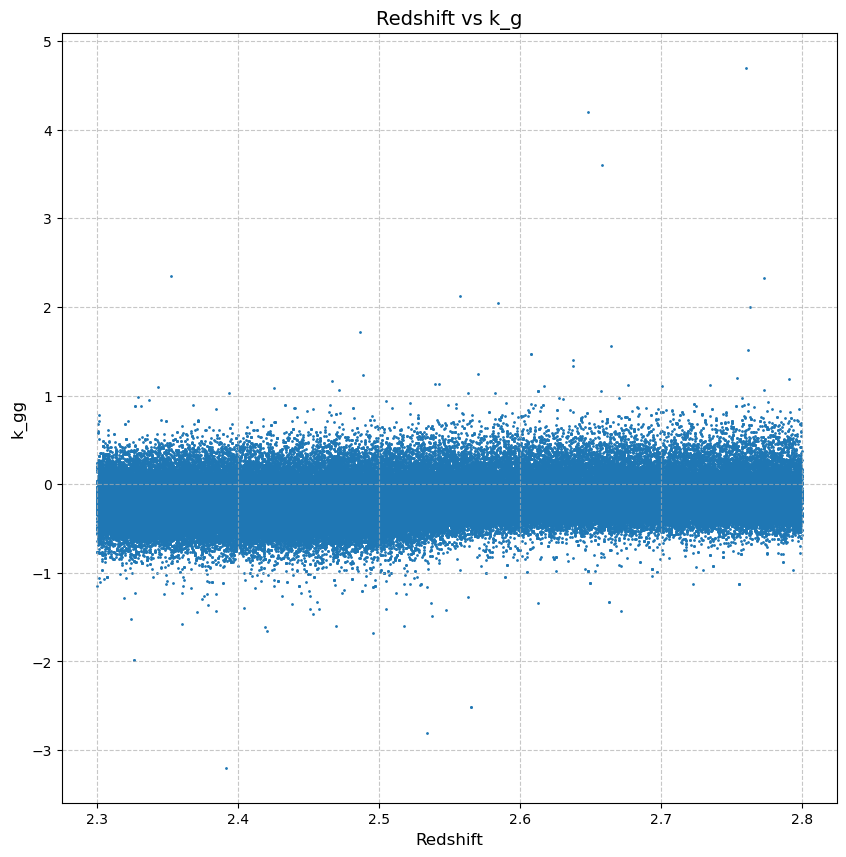

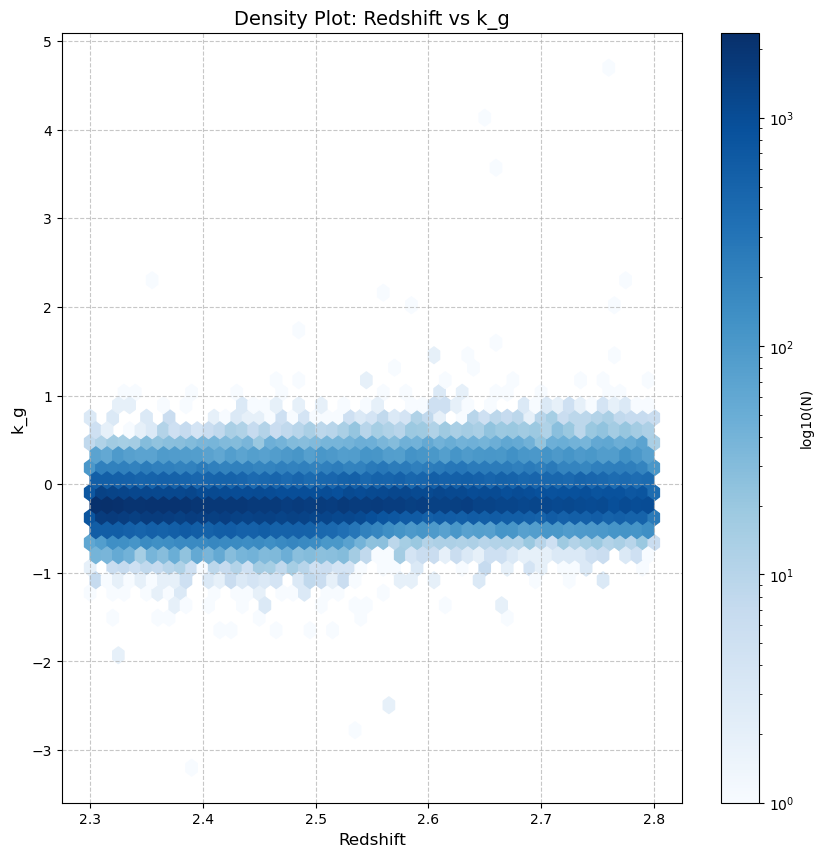

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_gg,s=1)
plt.title('Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_gg', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_g1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_g', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_g2', dpi=300)  # Saving the hexbin plot

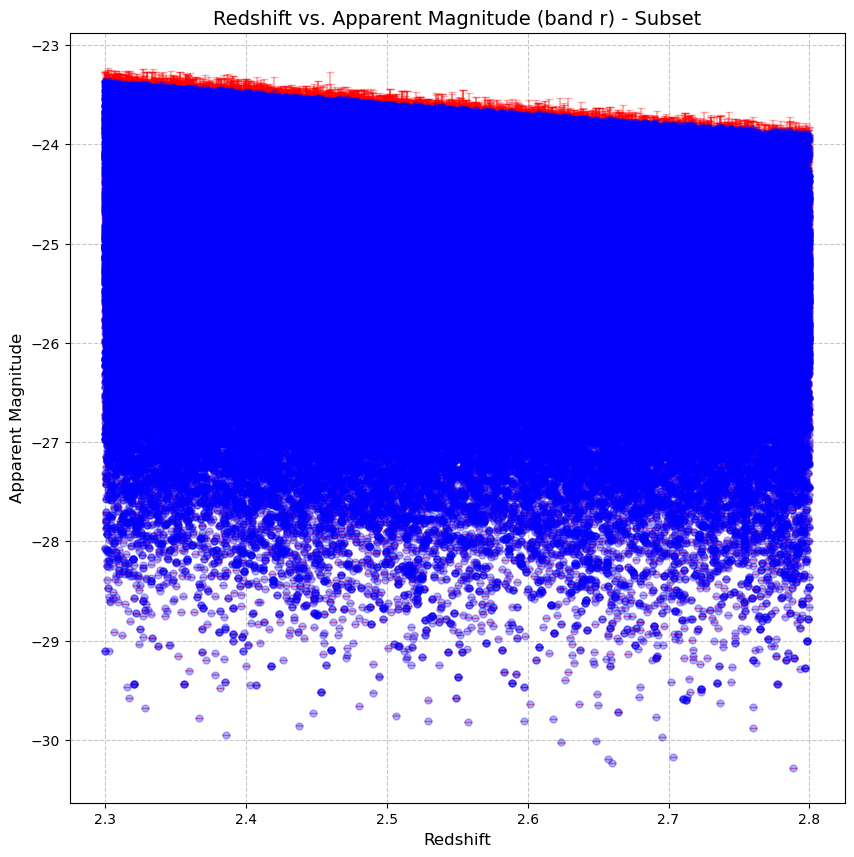

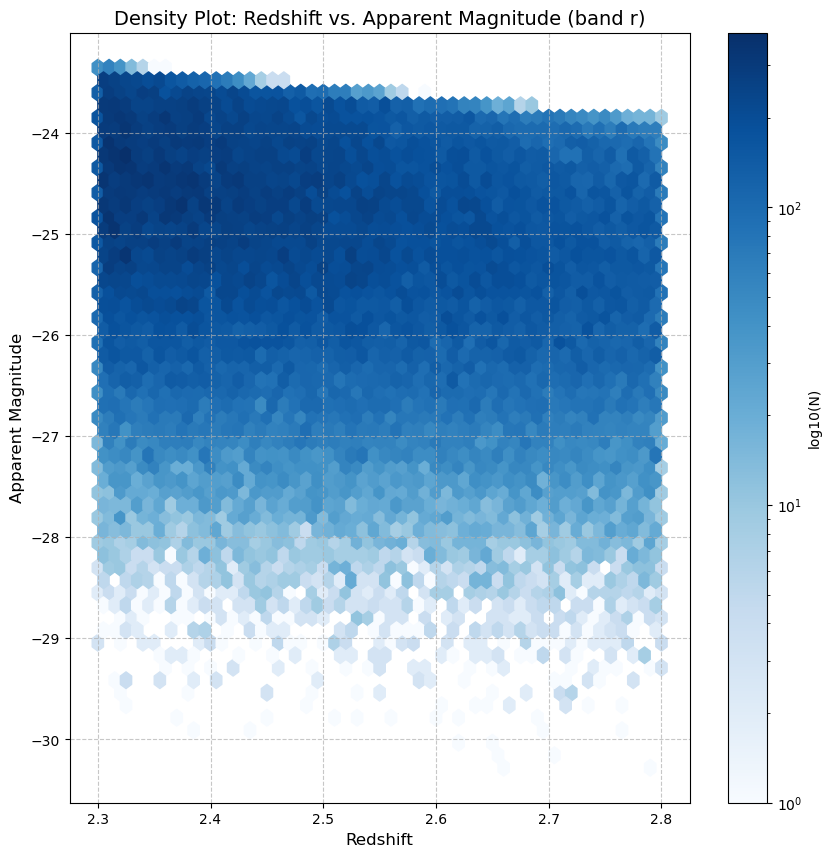

In [13]:
plt.figure(figsize=(10, 10))
plt.errorbar(z, apr_mag_r-d, yerr=apr_mag_r_err, fmt='o', color='blue', ecolor='red', capsize=3, markersize=5, alpha=0.3)
plt.title('Redshift vs. Apparent Magnitude (band r) - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_r', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_r-d, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Apparent Magnitude (band r)', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_r_density', dpi=300)  # Saving the hexbin plot

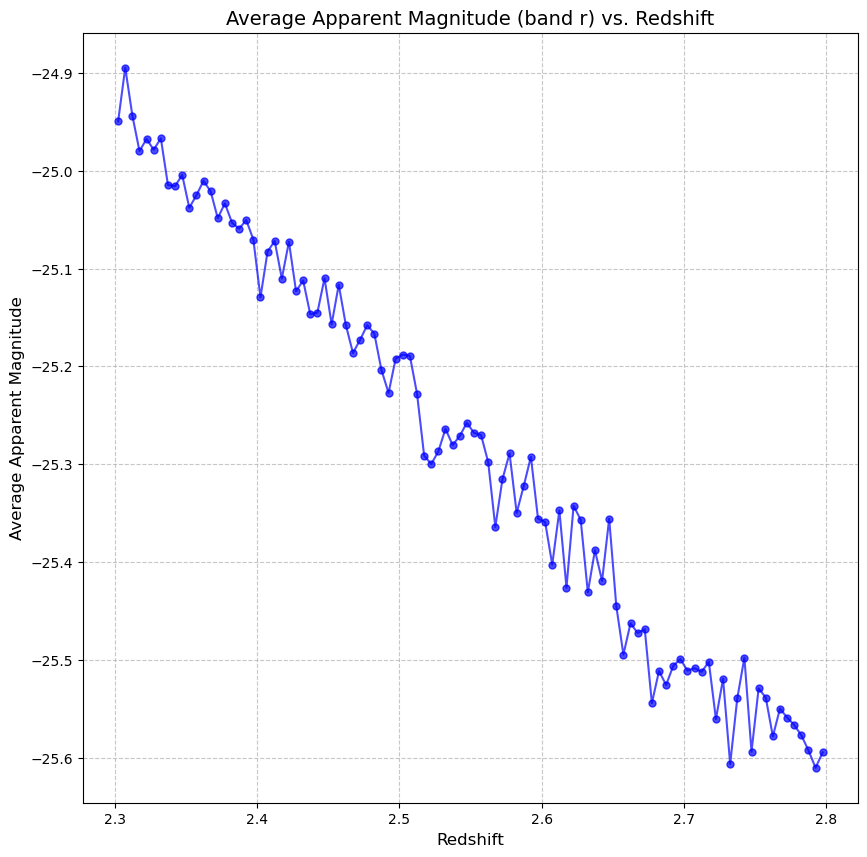

In [14]:
# Define the bins
num_bins = 100
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average magnitude for each bin
avg_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_magnitude.append(np.mean(apr_mag_r[bin_mask] - d[bin_mask]))
    else:
        avg_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Apparent Magnitude (band r) vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_apr_mag_r', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [15]:
print(max(avg_magnitude)-min(avg_magnitude))

0.7157308199016157


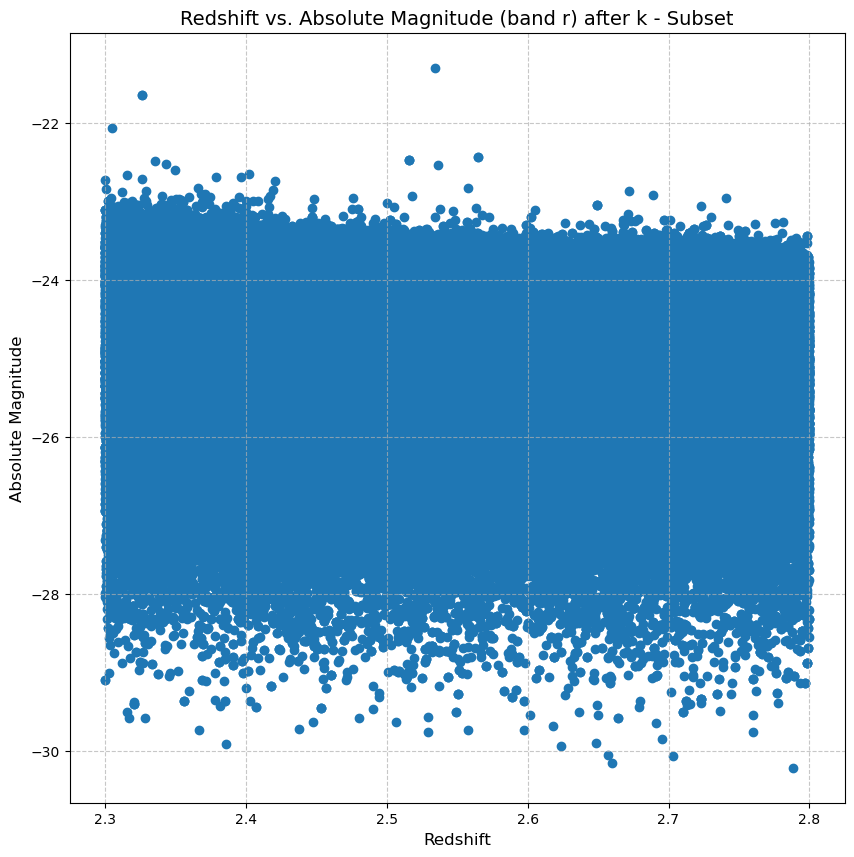

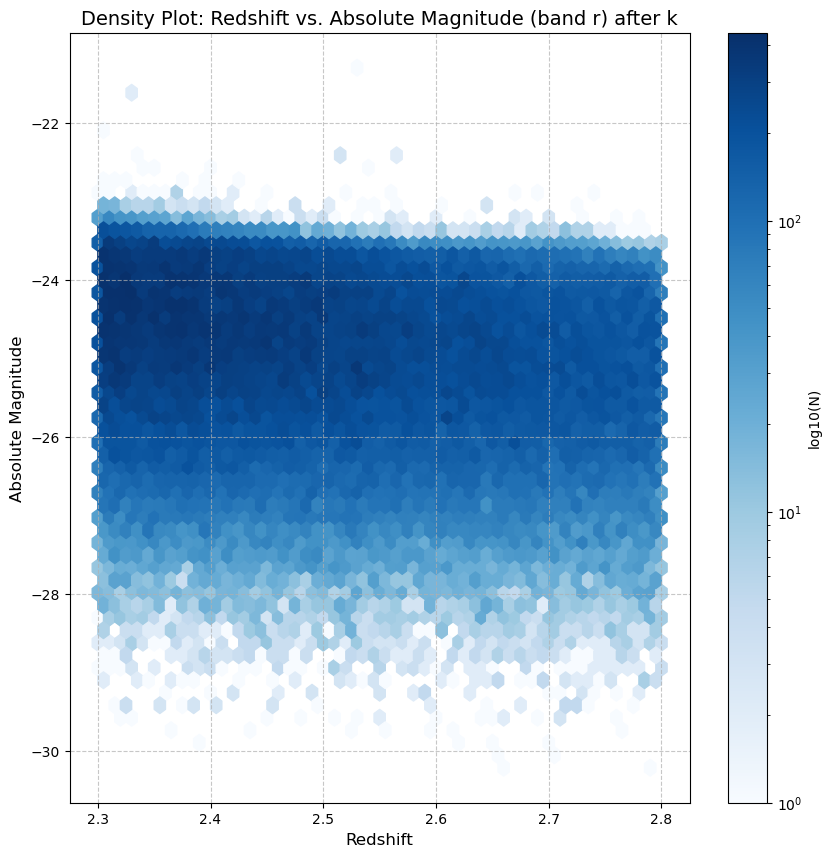

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(z, apr_mag_r-d-k_rr)
plt.title('Redshift vs. Absolute Magnitude (band r) after k - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_r', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_r-d-k_rr, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Absolute Magnitude (band r) after k', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_density_r', dpi=300)  # Saving the hexbin plot

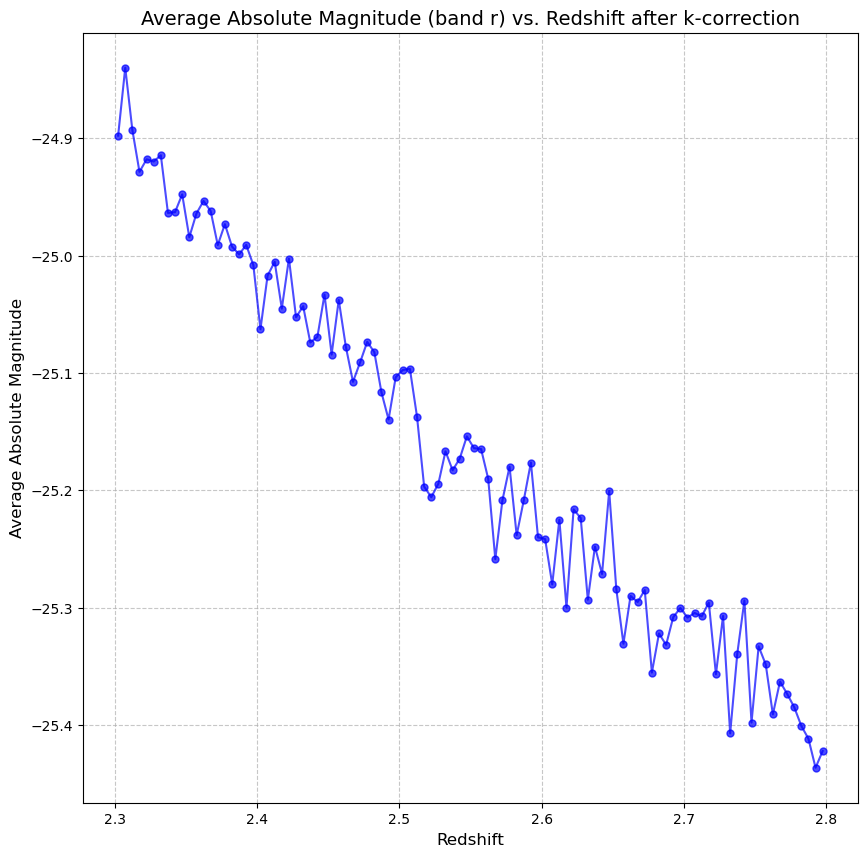

In [17]:
# Define the bins
num_bins = 100
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average absolute magnitude for each bin
avg_absolute_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_absolute_magnitude.append(np.mean(apr_mag_r[bin_mask] - d[bin_mask] - k_rr[bin_mask]))
    else:
        avg_absolute_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average absolute magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_absolute_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Absolute Magnitude (band r) vs. Redshift after k-correction', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_abs_mag_r', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [18]:
print(max(avg_absolute_magnitude)-min(avg_absolute_magnitude))

0.5961312665480918


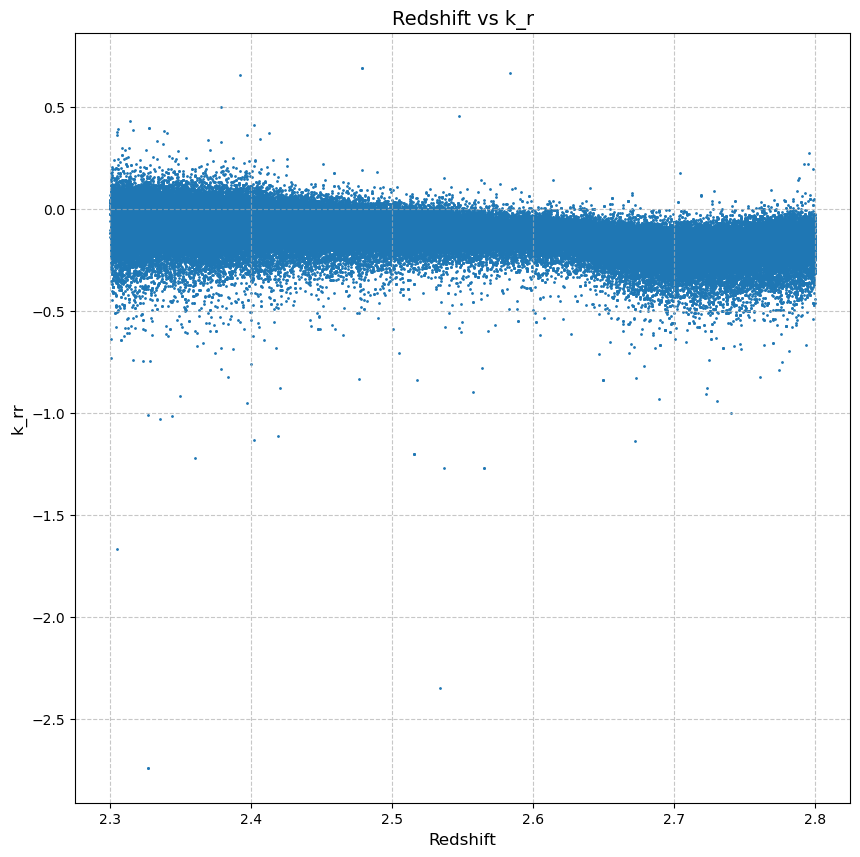

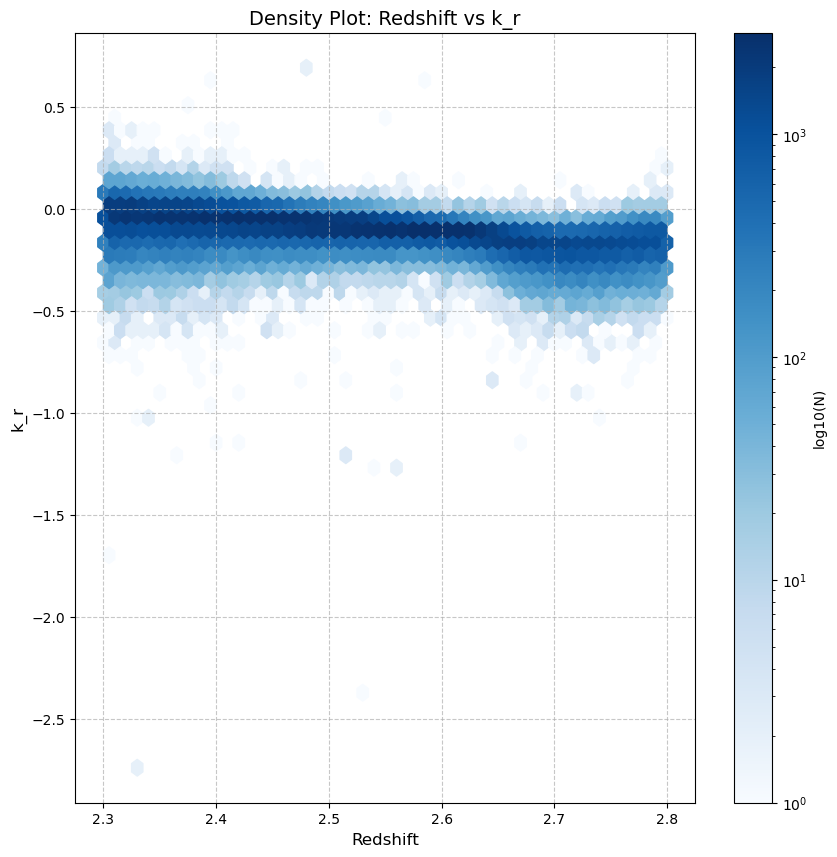

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_rr,s=1)
plt.title('Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_rr', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_r1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_rr, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_r', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_r2', dpi=300)  # Saving the hexbin plot